# Total Events

Workbook aggregates how many of each event happened and plot in a bar graph. 

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data and check

df = pd.read_csv("../Data/data.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])

df.set_index("DateTime", inplace=True)

df.head(10)

,Feed,Poo,Wee,Vomit
DateTime,,,,
2022-07-30 13:00:00,True,True,True,False
2022-07-30 17:00:00,True,False,True,False
2022-07-30 19:45:00,True,False,True,False
2022-07-30 22:20:00,True,True,False,False
2022-07-31 01:25:00,True,True,True,False
2022-07-31 05:30:00,True,False,True,False
2022-07-31 09:45:00,True,False,True,False
2022-07-31 14:00:00,True,False,True,False
2022-07-31 18:30:00,True,False,True,False


In [3]:
# sum each event and create new dataframe

df_totals = pd.DataFrame(df.sum(), columns=["Frequency"])
df_totals.sort_values(by="Frequency", ascending=False, inplace=True)

df_totals

,Frequency
Feed,2391
Wee,2273
Poo,519
Vomit,37


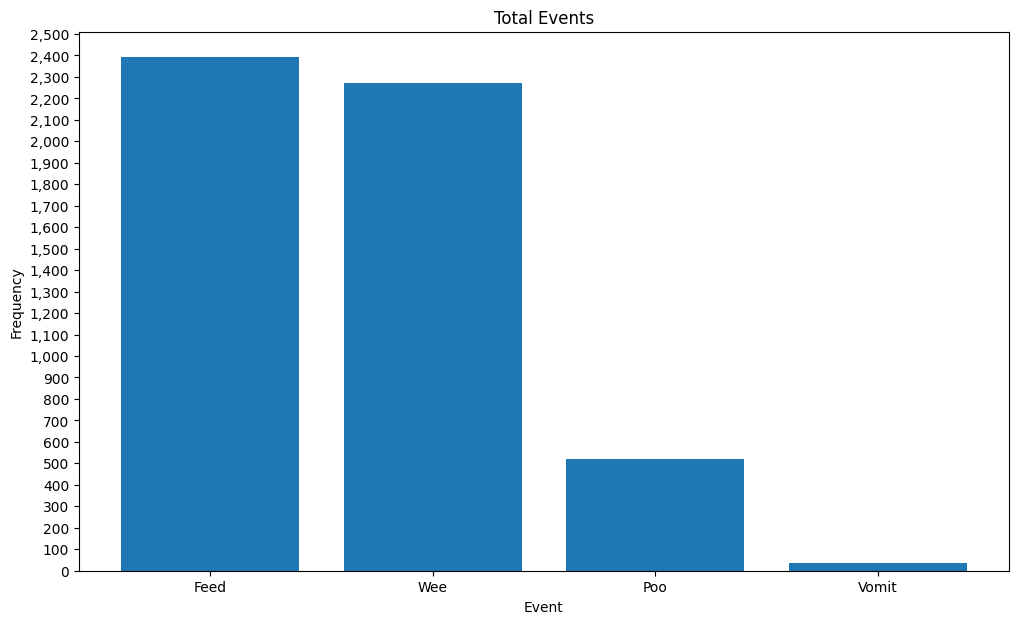

In [4]:
# plot as bar graph

plt.figure(figsize=(12,7))
plt.bar(df_totals.index, df_totals["Frequency"])
plt.title("Total Events")
plt.xlabel("Event")
plt.yticks(
            [y for y in np.arange(0,df_totals.max()["Frequency"]+200,100)], 
            [f"{y:,}" for y in np.arange(0,df_totals.max()["Frequency"]+200,100)]
           )
plt.ylabel("Frequency")
plt.show()

In [5]:
# transform dataframe for saving as json
df_js = df_totals.reset_index()
df_js.rename(columns={"index":"Event"}, inplace=True)

# save to file
df_js.to_json(path_or_buf="../Data/Website_Data/total_events.json", orient="records")